# A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning and end of your recorded signal. Listen to the new signal and perceptually compare the audio with original.

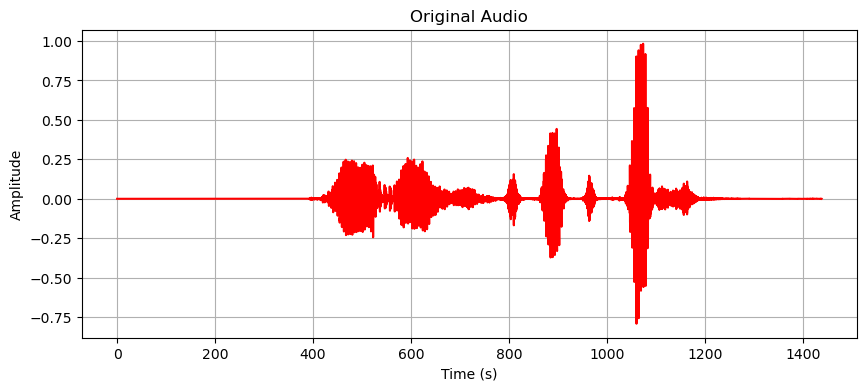

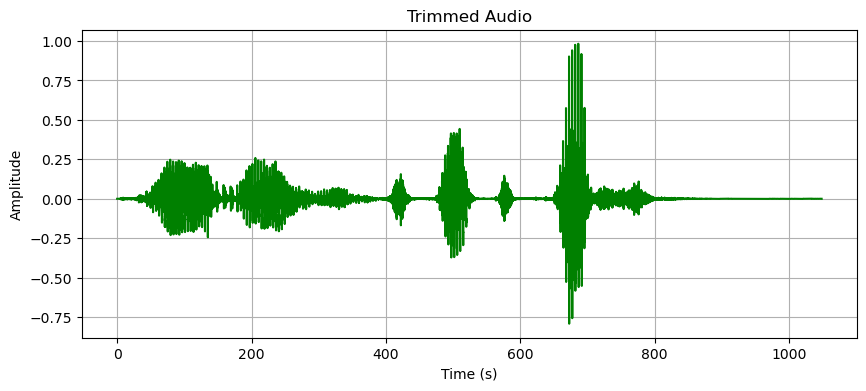

Original Audio:


Trimmed Audio:


In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
# Load the audio file
file_path = "VISHNU_lab1.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Trim the silence parts
trimmed_audio, _ = librosa.effects.trim(audio_signal)
# Create a time array for plotting
original_time = librosa.times_like(audio_signal, sr=sample_rate)
trimmed_time = librosa.times_like(trimmed_audio, sr=sample_rate)

# Plot the waveform for original audio
plt.figure(figsize=(10, 4))
plt.plot(original_time, audio_signal, color='r')
plt.title("Original Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Plot the waveform for trimmed audio
plt.figure(figsize=(10, 4))
plt.plot(trimmed_time, trimmed_audio, color='g')
plt.title("Trimmed Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Listen to the original audio
print("Original Audio:")
ipd.display(ipd.Audio(audio_signal, rate=sample_rate))

# Listen to the trimmed audio
print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sample_rate))

# A2. Use librosa.effects.split() to split the recorded speech with detected silences. Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.



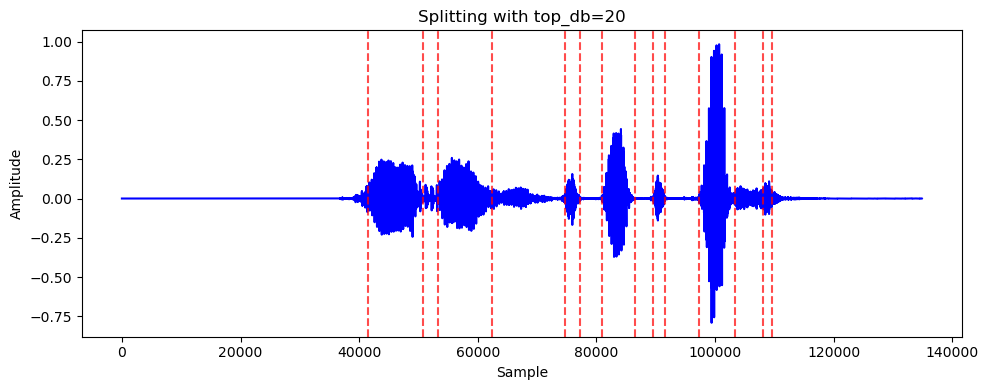

Split Audio with top_db=20:


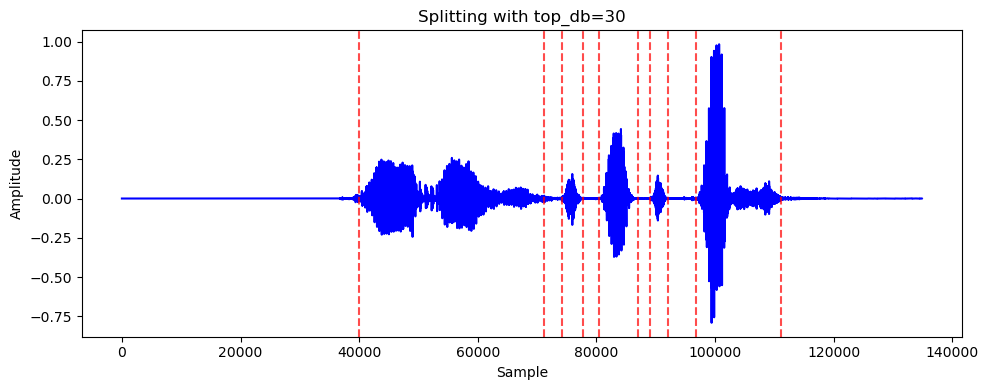

Split Audio with top_db=30:


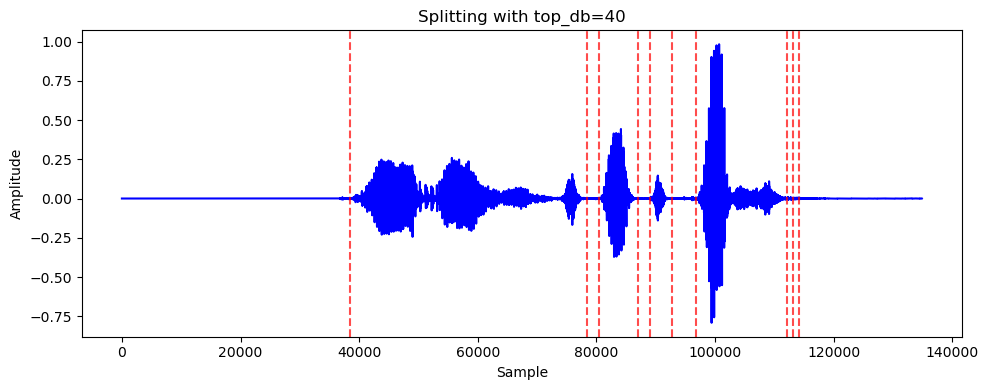

Split Audio with top_db=40:


In [2]:
# Perform splitting with different top_db values
top_db_values = [20, 30, 40]  # You can adjust these values as needed
for top_db in top_db_values:
    # Split the audio using top_db parameter
    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)

    # Plot the split intervals on the waveform
    plt.figure(figsize=(10, 4))
    plt.plot(audio_signal, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='r', linestyle='--', alpha=0.7)
        plt.axvline(interval[1], color='r', linestyle='--', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    # Listen to the generated signals after splitting
    print(f"Split Audio with top_db={top_db}:")
    for i, interval in enumerate(split_audio_intervals):
        split_audio = audio_signal[interval[0]:interval[1]]
        ipd.display(ipd.Audio(split_audio, rate=sample_rate))
        # Limit the number of intervals to play for clarity
        if i >= 2:
            break

# A3. Use the IEEE paper reference available above for silence detection. Compare the results with the silence detection output from librosa package.

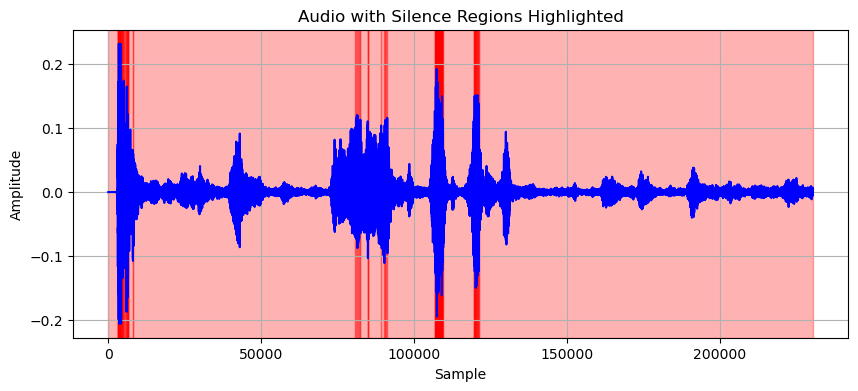

In [3]:
# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "naveen_lab1.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Plot the waveform with silence regions highlighted
plt.figure(figsize=(10, 4))
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# comparison of Silent regions between librosa.effects.split() and the IEEE paper

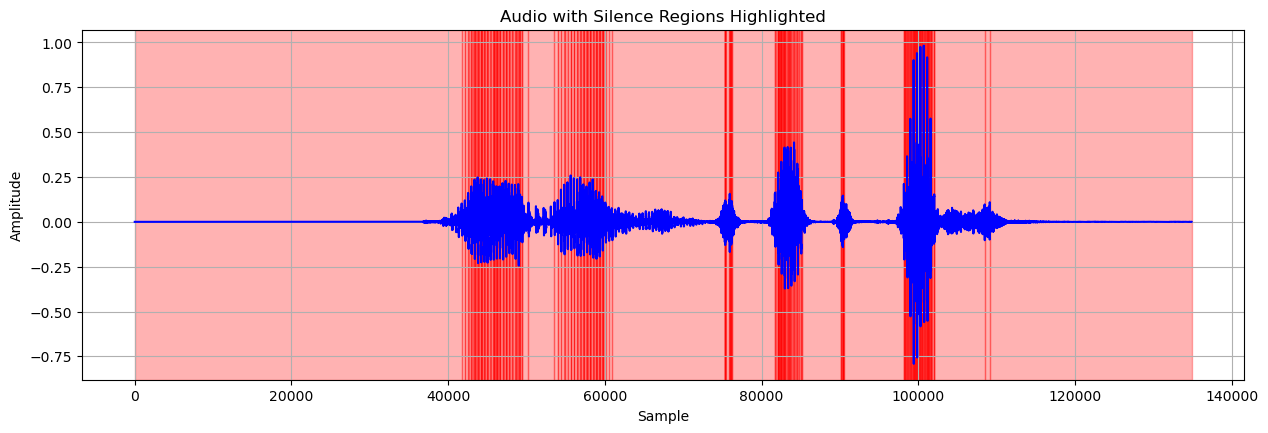

In [4]:
# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "VISHNU_lab1.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Perform splitting with different top_db values
top_db_values = [20, 30, 40]  # You can adjust these values as needed

# Plot the waveform with silence regions highlighted and split intervals overlaid
plt.figure(figsize=(15, 10))

# Plot the waveform with silence regions highlighted
plt.subplot(2, 1, 1)
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)

C:\Users\nk432\AppData\Local\Temp\ipykernel_14976\332561009.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


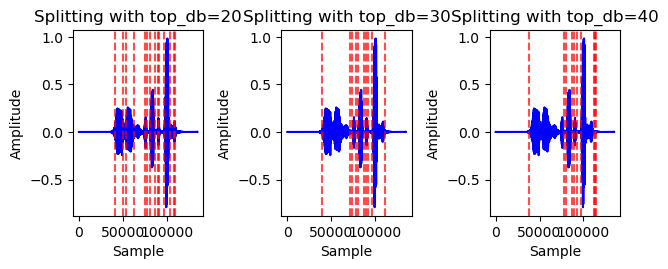

In [5]:
# Plot the waveform with split intervals overlaid
for i, top_db in enumerate(top_db_values):
    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)
    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)
    plt.plot(audio_signal, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='r', linestyle='--', alpha=0.7)
        plt.axvline(interval[1], color='r', linestyle='--', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.show()